# Importing Data in Python

In order to import data into Python, you should first have an idea of what files are in your working directory.

IPython, which is running on DataCamp's servers, has a bunch of cool commands, including its **magic commands** ([more](https://ipython.readthedocs.io/en/stable/overview.html#main-features-of-the-interactive-shell)). For example, starting a line with `!` gives you complete system shell access. This means that the IPython magic command `! ls` will display the contents of your current directory. 

## Flat Files
### Importing entire plain text files

In [2]:
# Open a file: file
file = open('data/moby_dick.txt', mode='r')

# Print it
print(file.read())

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed)

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

### Importing text files line by line
For large files, we may not want to print all of their content to the shell: you may wish to print only the first few lines. Enter the `readline()` method, which allows you to do this. When a file called file is open, you can print out the first line by executing `file.readline()`. If you execute the same command again, the second line will print, and so on.

You can bind a variable file by using a **context manager** construct:

`with open('moby_dick.txt') as file:`

While still within this construct, the variable `file` will be bound to `open('huck_finn.txt');` thus, to print the file to the shell, all the code you need to execute is:

In [4]:
with open('data/moby_dick.txt') as file:
    print(file.readline())

CHAPTER 1. Loomings.



In [5]:
# Read & print the first 3 lines
with open('data/moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

CHAPTER 1. Loomings.



Call me Ishmael. Some years ago--never mind how long precisely--having



A **flat file** is a text file containg structured data (records, rows of fields or attributes), for example table data. Flat files can have a header, first row containing fields/attributes/column names.

### Importing flat files using NumPy

<class 'numpy.ndarray'>


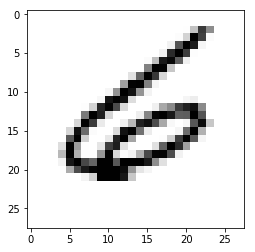

In [10]:
# Import package
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# From: http://yann.lecun.com/exdb/mnist/

# Assign filename to variable: file
file = 'data/digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show();

There are a number of arguments that `np.loadtxt()` takes that you'll find useful: `delimiter` changes the delimiter that `loadtxt()` is expecting, for example, you can use ',' and '\t' for comma-delimited and tab-delimited respectively; `skiprows` allows you to specify how many rows (not indices) you wish to skip; `usecols` takes a list of the indices of the columns you wish to keep.

Complete the arguments of `np.loadtxt()`: the file you're importing is tab-delimited, you want to skip the first row and you only want to import the first and third columns.

In [17]:
# Import numpy
import numpy as np

# Assign the filename: file
file = 'data/digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0,2])

# Print data
#print(data)[:]
data[:10]

array([[1., 0.],
       [0., 0.],
       [1., 0.],
       [4., 0.],
       [0., 0.],
       [0., 0.],
       [7., 0.],
       [3., 0.],
       [5., 0.],
       [3., 0.]])

### Importing different datatypes

The file `seaslug.txt`: 
- has a text header, consisting of strings
- is tab-delimited.

These data consists of percentage of sea slug larvae that had metamorphosed in a given time period. [Read more here](http://www.stat.ucla.edu/~rgould/datasets/aboutseaslugs.html).

Due to the header, if you tried to import it as-is using `np.loadtxt()`, Python would throw you a `ValueError` and tell you that it could not convert string to float. There are two ways to deal with this: 
- firstly, you can set the data type argument `dtype` equal to str (for string).
- Alternatively, you can skip the first row as we have seen before, using the `skiprows` argument.

['Time' 'Percent']
[0.    0.357]


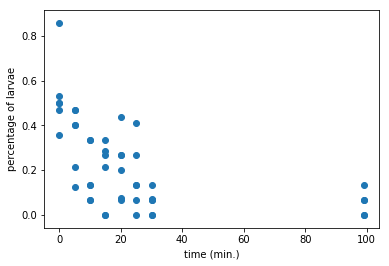

In [18]:
# Assign filename: file
file = 'data/seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show();

Much of the time you will need to import datasets which have **different datatypes in different columns**; one column may contain strings and another floats, for example. The function `np.loadtxt()` will freak at this. There is another function, `np.genfromtxt()`, which can handle such structures. If we pass `dtype=None` to it, it will figure out what types each column should be.

Here, the first argument is the `filename`, the second specifies the `delimiter` , and the third argument `names` tells us there is a header. Because the data are of different types, data is an object called a structured array. Because numpy arrays have to contain elements that are all the same type, the structured array solves this by being a 1D array, where each element of the array is a row of the flat file imported. You can test this by checking out the array's shape in the shell by executing `np.shape(data)`.

Accessing rows and columns of structured arrays is super-intuitive: to get the ith row, merely execute `data[i]` and to get the column with name 'Fare', execute `data['Fare']`.

In [19]:
data = np.genfromtxt('data/titanic.csv', delimiter=',', names=True, dtype=None)
np.shape(data)

/Users/ksatola/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


(891,)

In [23]:
data[:5]

array([(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S'),
       (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C'),
       (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S'),
       (4, 1, 1, b'female', 35., 1, 0, b'113803', 53.1   , b'C123', b'S'),
       (5, 0, 3, b'male', 35., 0, 0, b'373450',  8.05  , b'', b'S')],
      dtype=[('PassengerId', '<i8'), ('Survived', '<i8'), ('Pclass', '<i8'), ('Sex', 'S6'), ('Age', '<f8'), ('SibSp', '<i8'), ('Parch', '<i8'), ('Ticket', 'S18'), ('Fare', '<f8'), ('Cabin', 'S15'), ('Embarked', 'S1')])

In [24]:
data[0]

(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171', 7.25, b'', b'S')

In [26]:
data['Fare'][:5]

array([ 7.25  , 71.2833,  7.925 , 53.1   ,  8.05  ])

In [28]:
data['Survived'][-4:]

array([1, 0, 1, 0])

To import data containing mixed datatypes, there is also another function `np.recfromcsv()` that behaves similarly to `np.genfromtxt()`, except that its default dtype is None. 

In [29]:
# Assign the filename: file
file = 'data/titanic.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv(file, delimiter=',', names=True, dtype=None)

# Print out first three entries of d
print(d[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


/Users/ksatola/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2315: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


### Importing flat files using pandas